In [1]:
import numpy as np
import pandas as pd
import os

DATA_PATH = "../data/"
birds = os.listdir(DATA_PATH + "train_audio/")

print("Classes of Birds: \n", birds)
print("\nTotal classes of birds:", len(birds))

ModuleNotFoundError: No module named 'pandas'

In [2]:
train = pd.read_csv(DATA_PATH + "train_metadata.csv")
train.info()
train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14852 entries, 0 to 14851
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   primary_label     14852 non-null  object 
 1   secondary_labels  14852 non-null  object 
 2   type              14852 non-null  object 
 3   latitude          14852 non-null  float64
 4   longitude         14852 non-null  float64
 5   scientific_name   14852 non-null  object 
 6   common_name       14852 non-null  object 
 7   author            14852 non-null  object 
 8   license           14852 non-null  object 
 9   rating            14852 non-null  float64
 10  time              14852 non-null  object 
 11  url               14852 non-null  object 
 12  filename          14852 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.5+ MB


,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,time,url,filename
0,afrsil1,[],"['call', 'flight call']",12.3910,-1.4930,Euodice cantans,African Silverbill,Bram Piot,Creative Commons Attribution-NonCommercial-Sha...,2.5,08:00,https://www.xeno-canto.org/125458,afrsil1/XC125458.ogg
1,afrsil1,"['houspa', 'redava', 'zebdov']",['call'],19.8801,-155.7254,Euodice cantans,African Silverbill,Dan Lane,Creative Commons Attribution-NonCommercial-Sha...,3.5,08:30,https://www.xeno-canto.org/175522,afrsil1/XC175522.ogg
2,afrsil1,[],"['call', 'song']",16.2901,-16.0321,Euodice cantans,African Silverbill,Bram Piot,Creative Commons Attribution-NonCommercial-Sha...,4.0,11:30,https://www.xeno-canto.org/177993,afrsil1/XC177993.ogg
3,afrsil1,[],"['alarm call', 'call']",17.0922,54.2958,Euodice cantans,African Silverbill,Oscar Campbell,Creative Commons Attribution-NonCommercial-Sha...,4.0,11:00,https://www.xeno-canto.org/205893,afrsil1/XC205893.ogg
4,afrsil1,[],['flight call'],21.4581,-157.7252,Euodice cantans,African Silverbill,Ross Gallardy,Creative Commons Attribution-NonCommercial-Sha...,3.0,16:30,https://www.xeno-canto.org/207431,afrsil1/XC207431.ogg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14847,zebdov,[],"['adult', 'song']",22.6499,120.2872,Geopelia striata,Zebra Dove,Jerome Chie-Jen Ko,Creative Commons Attribution-NonCommercial-Sha...,2.5,08:36,https://www.xeno-canto.org/629769,zebdov/XC629769.ogg
14848,zebdov,[],"['adult', 'sex uncertain', 'song']",1.4168,103.7287,Geopelia striata,Zebra Dove,Kim Chuah Lim,Creative Commons Attribution-NonCommercial-Sha...,4.0,08:00,https://www.xeno-canto.org/642415,zebdov/XC642415.ogg
14849,zebdov,[],"['adult', 'call', 'sex uncertain']",1.4347,103.7043,Geopelia striata,Zebra Dove,Kim Chuah Lim,Creative Commons Attribution-NonCommercial-Sha...,4.0,09:00,https://www.xeno-canto.org/665873,zebdov/XC665873.ogg
14850,zebdov,[],['song'],3.3508,101.2451,Geopelia striata,Zebra Dove,Jelle Scharringa,Creative Commons Attribution-NonCommercial-Sha...,2.5,11:15,https://www.xeno-canto.org/666194,zebdov/XC666194.ogg


[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
0        2.5
1        3.5
2        4.0
3        4.0
4        3.0
        ... 
14847    2.5
14848    4.0
14849    4.0
14850    2.5
14851    2.5
Name: rating, Length: 14852, dtype: float64


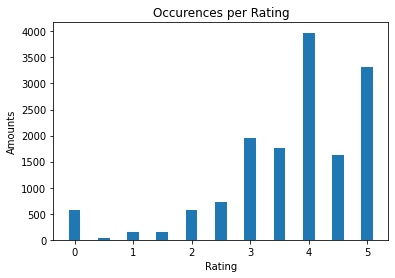

In [3]:
train["rating"].describe()

import matplotlib.pyplot as plt
vals = np.arange(0., 5.5, 0.5)
print(vals)

print(train["rating"])
plt.title("Occurences per Rating")
plt.ylabel("Amounts")
plt.xlabel("Rating")
occurences = [train["rating"].value_counts()[rating] for rating in vals ]
plt.bar(vals, occurences, width= 0.2)
plt.show()

In [4]:
mean_rating = train[["primary_label", "rating"]].groupby("primary_label").mean()
print(mean_rating)
sorted_mean_rating = mean_rating.sort_values(by=["rating"])
print("Birds with the lowest 10 ratings:\n")
sorted_mean_rating[:10]

                 rating
primary_label          
afrsil1        3.437500
akekee         3.916667
akepa1         3.700000
akiapo         3.892857
akikik         3.500000
...                 ...
whttro         3.760870
wiltur         3.565789
yebcar         3.125000
yefcan         3.776119
zebdov         3.685393

[152 rows x 1 columns]
Birds with the lowest 10 ratings:



,rating
primary_label,
canvas,1.600000
gresca,1.656250
japqua,1.825581
crehon,2.000000
lessca,2.285714
parjae,2.395161
buffle,2.633333
hawpet1,2.666667
ruff,2.814286


In [5]:
train.loc[train["primary_label"] == "canvas"]

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,time,url,filename
2776,canvas,['ribgul'],['call'],42.3473,-82.9753,Aythya valisineria,Canvasback,Allen T. Chartier,Creative Commons Attribution-NonCommercial-Sha...,2.5,?,https://www.xeno-canto.org/11836,canvas/XC11836.ogg
2777,canvas,[],['call'],40.0270,-74.9900,Aythya valisineria,Canvasback,Paul Driver,Creative Commons Attribution-NonCommercial-Sha...,4.0,08:48,https://www.xeno-canto.org/169220,canvas/XC169220.ogg
2778,canvas,[],['call'],40.0270,-74.9900,Aythya valisineria,Canvasback,Paul Driver,Creative Commons Attribution-NonCommercial-Sha...,4.0,08:50,https://www.xeno-canto.org/169222,canvas/XC169222.ogg
2779,canvas,[],['call'],40.0270,-74.9900,Aythya valisineria,Canvasback,Paul Driver,Creative Commons Attribution-NonCommercial-Sha...,4.0,08:47,https://www.xeno-canto.org/169224,canvas/XC169224.ogg
2780,canvas,[],['call'],40.0270,-74.9900,Aythya valisineria,Canvasback,Paul Driver,Creative Commons Attribution-NonCommercial-Sha...,0.0,08:45,https://www.xeno-canto.org/169325,canvas/XC169325.ogg
2781,canvas,[],['call'],40.0270,-74.9900,Aythya valisineria,Canvasback,Paul Driver,Creative Commons Attribution-NonCommercial-Sha...,0.0,08:02,https://www.xeno-canto.org/169326,canvas/XC169326.ogg
2782,canvas,[],['call'],40.0270,-74.9900,Aythya valisineria,Canvasback,Paul Driver,Creative Commons Attribution-NonCommercial-Sha...,0.0,09:02,https://www.xeno-canto.org/169327,canvas/XC169327.ogg
2783,canvas,[],['song'],48.3019,-112.9823,Aythya valisineria,Canvasback,Thomas Magarian,Creative Commons Attribution-NonCommercial-Sha...,0.0,10:23,https://www.xeno-canto.org/371329,canvas/XC371329.ogg
2784,canvas,['cangoo'],['song'],48.3019,-112.9823,Aythya valisineria,Canvasback,Thomas Magarian,Creative Commons Attribution-NonCommercial-Sha...,0.0,10:11,https://www.xeno-canto.org/371522,canvas/XC371522.ogg
2785,canvas,[],"['male', 'wing beats']",34.7305,136.5285,Aythya valisineria,Canvasback,Anon Torimi,Creative Commons Attribution-NonCommercial-Sha...,1.5,08:35,https://www.xeno-canto.org/443702,canvas/XC443702.ogg


In [24]:
import librosa
import IPython.display as ipd

def plot_wave(SOUND_DIR):
    # listen to the recording
    ipd.display(ipd.Audio(SOUND_DIR))
    # load the mp3 file
    signal, sr = librosa.load(SOUND_DIR, duration=10)  # sr = sampling rate
    print(signal,sr)
    # plot recording signal
    plt.figure(figsize=(10, 4))
    plt.plot(signal)
    plt.title("Sound Wave")
    plt.show()
    print('\n\n')


import librosa.display
# Plot spectogram
def plot_spectogram(SOUND_DIR):
    signal, sr = librosa.load(SOUND_DIR, duration=10)
    print(signal,sr)
    plt.figure(figsize=(10, 4))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(signal)), ref=np.max)
    librosa.display.specshow(D, y_axis="linear")
    plt.colorbar(format="%+2.0f dB")
    plt.title("Linear-frequency power spectrogram")
    plt.show()
    print('\n\n')

[ 3.5801619e-07 -5.7341535e-06  4.4984758e-06 ...  3.7707973e-04
 -7.3790090e-04 -3.3364091e-03] 22050


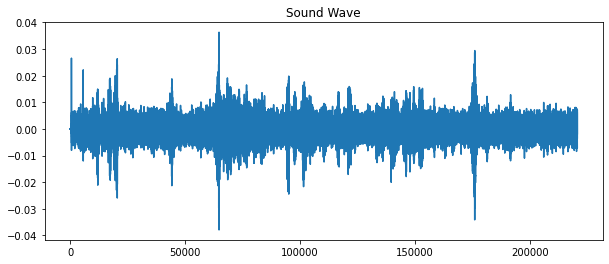

In [23]:
plot_wave(DATA_PATH + "train_audio/canvas/XC169325.ogg")

[ 3.5801619e-07 -5.7341535e-06  4.4984758e-06 ...  3.7707973e-04
 -7.3790090e-04 -3.3364091e-03] 22050


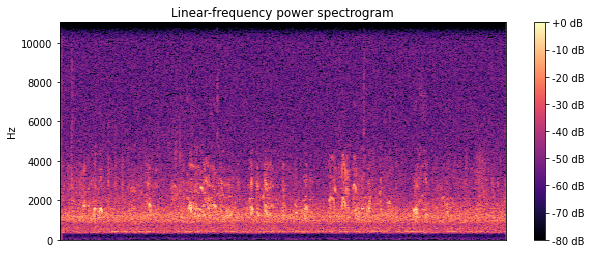

In [8]:
plot_spectogram(DATA_PATH + "train_audio/canvas/XC169325.ogg")

[ 9.8714008e-06 -1.4993859e-06  3.4368791e-06 ...  2.3866119e-03
  1.1414958e-03 -6.3020806e-04] 22050


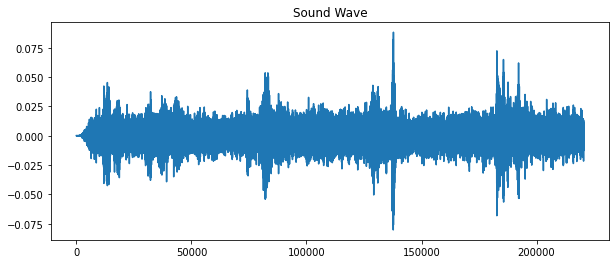

In [9]:
plot_wave(DATA_PATH + "train_audio/canvas/XC169220.ogg")

[ 9.8714008e-06 -1.4993859e-06  3.4368791e-06 ...  2.3866119e-03
  1.1414958e-03 -6.3020806e-04] 22050


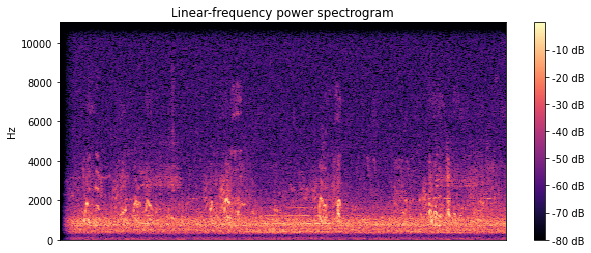

In [10]:
plot_spectogram(DATA_PATH + "train_audio/canvas/XC169220.ogg")

In [11]:
test = pd.read_csv(DATA_PATH + "test.csv")
test.info()
test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   row_id    3 non-null      object
 1   file_id   3 non-null      object
 2   bird      3 non-null      object
 3   end_time  3 non-null      int64 
dtypes: int64(1), object(3)
memory usage: 224.0+ bytes


,row_id,file_id,bird,end_time
0,soundscape_1000170626_akiapo_5,soundscape_1000170626,akiapo,5
1,soundscape_1000170626_akiapo_10,soundscape_1000170626,akiapo,10
2,soundscape_1000170626_akiapo_15,soundscape_1000170626,akiapo,15


In [12]:
taxonomy = pd.read_csv(DATA_PATH + "eBird_Taxonomy_v2021.csv")
taxonomy.info()
taxonomy

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16753 entries, 0 to 16752
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   TAXON_ORDER       16753 non-null  int64 
 1   CATEGORY          16753 non-null  object
 2   SPECIES_CODE      16753 non-null  object
 3   PRIMARY_COM_NAME  16753 non-null  object
 4   SCI_NAME          16753 non-null  object
 5   ORDER1            16751 non-null  object
 6   FAMILY            16740 non-null  object
 7   SPECIES_GROUP     216 non-null    object
 8   REPORT_AS         3876 non-null   object
dtypes: int64(1), object(8)
memory usage: 1.2+ MB


,TAXON_ORDER,CATEGORY,SPECIES_CODE,PRIMARY_COM_NAME,SCI_NAME,ORDER1,FAMILY,SPECIES_GROUP,REPORT_AS
0,1,species,ostric2,Common Ostrich,Struthio camelus,Struthioniformes,Struthionidae (Ostriches),Ostriches,NaN
1,6,species,ostric3,Somali Ostrich,Struthio molybdophanes,Struthioniformes,Struthionidae (Ostriches),NaN,NaN
2,7,slash,y00934,Common/Somali Ostrich,Struthio camelus/molybdophanes,Struthioniformes,Struthionidae (Ostriches),NaN,NaN
3,8,species,grerhe1,Greater Rhea,Rhea americana,Rheiformes,Rheidae (Rheas),Rheas,NaN
4,14,species,lesrhe2,Lesser Rhea,Rhea pennata,Rheiformes,Rheidae (Rheas),NaN,NaN
...,...,...,...,...,...,...,...,...,...
16748,34694,species,slcgro1,Slate-colored Grosbeak,Saltator grossus,Passeriformes,Thraupidae (Tanagers and Allies),NaN,NaN
16749,34697,species,bltgro2,Black-throated Grosbeak,Saltator fuliginosus,Passeriformes,Thraupidae (Tanagers and Allies),NaN,NaN
16750,34698,spuh,saltat1,saltator sp.,Saltator sp.,Passeriformes,Thraupidae (Tanagers and Allies),NaN,NaN
16751,34699,spuh,passer1,passerine sp.,Passeriformes sp.,Passeriformes,NaN,Others,NaN


In [13]:
import json
f = open(DATA_PATH + "scored_birds.json")
scored_birds = json.load(f)

print("Number of scored birds:", len(scored_birds))

Number of scored birds: 21
